In [1]:
import sys, numpy as np, pandas as pd, matplotlib, sklearn
from sklearn.datasets import load_iris

np.random.seed(42)

iris = load_iris(as_frame=True)
x = iris.data
y = iris.target
clases = iris.target_names

df = x.copy()
df["target"] = y.map(dict(enumerate(clases)))

display(df.head())
display(df.groupby("target").agg(["mean", "std", "min", "max"]))
print("Clases:", list(clases))
print("Forma x: ", x.shape, "y: ", y.shape)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


sepal length (cm)                     sepal width (cm)            \
                        mean       std  min  max             mean       std   
target                                                                        
setosa                 5.006  0.352490  4.3  5.8            3.428  0.379064   
versicolor             5.936  0.516171  4.9  7.0            2.770  0.313798   
virginica              6.588  0.635880  4.9  7.9            2.974  0.322497   

                     petal length (cm)                     petal width (cm)  \
            min  max              mean       std  min  max             mean   
target                                                                        
setosa      2.3  4.4             1.462  0.173664  1.0  1.9            0.246   
versicolor  2.0  3.4             4.260  0.469911  3.0  5.1            1.326   
virginica   2.2  3.8             5.552  0.551895  4.5  6.9            2.026   

                                
                 std  min  max  
target                          
setosa      0.105386  0.1  0.6  
versicolor  0.197753  1.0  1.8  
virginica   0.274650  1.4  2.5

Clases: ['setosa', 'versicolor', 'virginica']
Forma x:  (150, 4) y:  (150,)


# Segun las medidas y desviaciones, ¿qué rasgos del pétalo parecen separar mejor las clases?

- El mas claro es el ancho del petalo ya que hay bastante diferencia en la media entre las tres variantes
- En el largo del sepalo tambien hay diferencia pero algo menos que en el petalo
- Tambien el ancho del sepalo de las setosas es bastante mas pequeño que el de las otras dos
  

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

# Si no estratificas los datos, ¿qué podría ocurrir con una clase minoritaria? Explica por qué eso haría que la métrica de accuracy fuese menos representativa

Si no se dividen los datos en entrenamiento y test estariamos probando el modelo con los mismos datos con los que lo hemos entenado por lo que podria suceder:
- Un Overfeeting ya que se aprende todos los datos
- Que cuando se pruebe con otros datos distintos que esten fuera del dataset inicial no sea preciso 

Acuracy (Naive Bayes, test): 0.911
Reporte: 
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.87        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



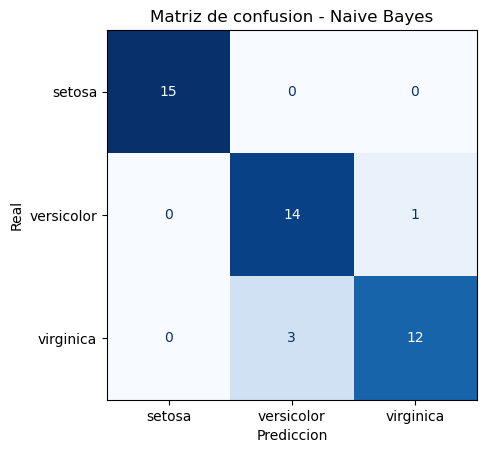

In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pylab as plt

nb = GaussianNB()
nb.fit(x_train, y_train)

y_pred_nb = nb.predict(x_test)
acc_nb = accuracy_score(y_test, y_pred_nb)
cm_nb = confusion_matrix(y_test, y_pred_nb)

print(f"Acuracy (Naive Bayes, test): {acc_nb:.3f}")
print("Reporte: ")
print(classification_report(y_test, y_pred_nb, target_names=clases))

disp = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=clases)
fig, ax = plt.subplots()
disp.plot(ax=ax, cmap="Blues", colorbar=False)
ax.set_title("Matriz de confusion - Naive Bayes")
ax.set_xlabel("Prediccion")
ax.set_ylabel("Real")
plt.tight_layout
plt.show()

# Mira la matriz de confusión ¿qué pares de clases se confunden más? ¿Qué te sugiere sobre la separabilidad de essas clases con estos rasgos?

- Las clases que mas se confunden son las virginicas con las versicolor 
- 